In [1]:
from glob import glob
from pathlib import Path
import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def make_predict(path):  
#     feats = {}
#     for file in Path(path).glob("*.txt"):
#         feats = np.loadtxt(file)
#         if len(feats.shape) > 1:
#             np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2,:])
#         else: 
#             np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2])

In [3]:
# path = "./chem_data/processed_output_some/0001_simple_cond/"
# make_predict(path)

In [4]:
# !python -m chem_data.chemgns --action='predict' --raw_data_path="./chem_data/to_predict"  --preped_data_path="./gns/prepared_topredict/"

In [5]:
# !python -m gns.train --mode="predict" --data_path="./gns/prepared_topredict/" --model_path="./gns/model/" --output_path="./gns/predicted_rollout" --model_file="model-300.pt" --train_state_file="train_state-300.pt"

# Check Results

In [6]:
import chem_data.analyze_results as ar

In [7]:
rollout_results = "./chem_data/proc_data/"

In [8]:
rollout_data = {}
for dir in os.listdir(rollout_results):
    if dir.startswith("."):  
        print(f"Skipping {dir}")
        continue

    path = rollout_results + dir
    rollout_data[dir] = ar.load_rollout_data(path)

Skipping .ipynb_checkpoints


In [9]:
rollout_data.keys()

dict_keys(['rep8', 'rep2', 'rep13', 'rep14', 'rep20', 'rep9', 'ex6', 'rep7', 'rep12', 'rep1', 'rep18', 'rep5', 'rep19', 'rep3', 'unnorm.pkl', 'rep16', 'rep4', 'rep6', 'rep10', 'rep11', 'rep17', 'ex7', 'ex1', 'ex8', 'rep15'])

In [10]:
rollout_data['ex1']['rollout_ex00_dict.pkl'].keys()

dict_keys(['loss', 'true_x', 'pred_x', 'mat_prop'])

In [11]:
loss_dict = {}
for k in rollout_data.keys():
    if (k != 'unnorm.pkl' and not k.startswith('ex')) or k == 'ex1':
        loss_dict[int(re.findall('[0-9]+', k)[0])] = float(rollout_data[k]['rollout_ex00_dict.pkl']['loss'])

In [12]:
losses = sorted(loss_dict.items())

In [13]:
losses

[(1, 5.281363337417133e-05),
 (2, 2.0108651369810104e-05),
 (3, 1.3032836250204127e-05),
 (4, 1.6300617062370293e-05),
 (5, 3.58802244591061e-05),
 (6, 1.1772709513024893e-05),
 (7, 0.00010324581671738997),
 (8, 0.00016996340127661824),
 (9, 2.182122625526972e-05),
 (10, 0.0001638058602111414),
 (11, 8.939539839047939e-06),
 (12, 0.00040952322888188064),
 (13, 0.000584566849283874),
 (14, 0.00015512935351580381),
 (15, 0.00013522237713914365),
 (16, 7.04208214301616e-05),
 (17, 0.0009824935114011168),
 (18, 6.232805026229471e-05),
 (19, 0.00016279426927212626),
 (20, 5.158905332791619e-05)]

In [14]:
xs = [e*300+300 for e, _ in losses]
ys = [l for _, l in losses]

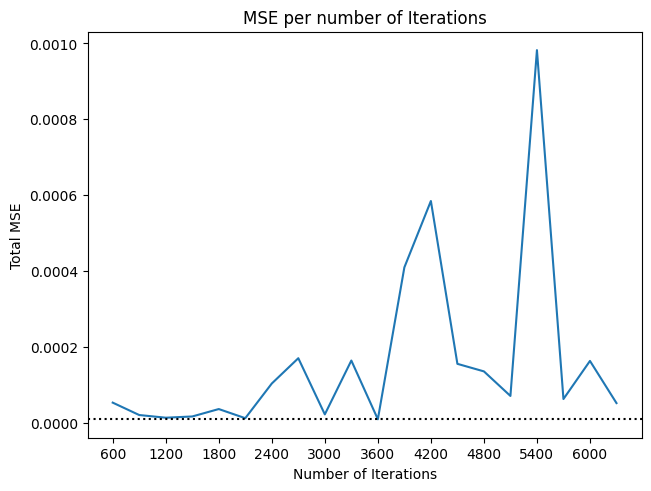

In [15]:
fig, ax = plt.subplots(layout='constrained')
ax.plot(xs, ys)
plt.axhline(y=min(ys), color="black", linestyle=":")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Total MSE')
ax.set_title('MSE per number of Iterations')
plt.xticks(xs[::2])
plt.savefig("mse.png")

In [16]:
ro = rollout_data['rep6']['rollout_ex00_dict.pkl']

In [17]:
true_x = ro['true_x']
pred_x = ro['pred_x']
mat_prop = ro['mat_prop']

In [18]:
true_x.keys()

dict_keys(['H2O', 'SO4', 'H2SO4'])

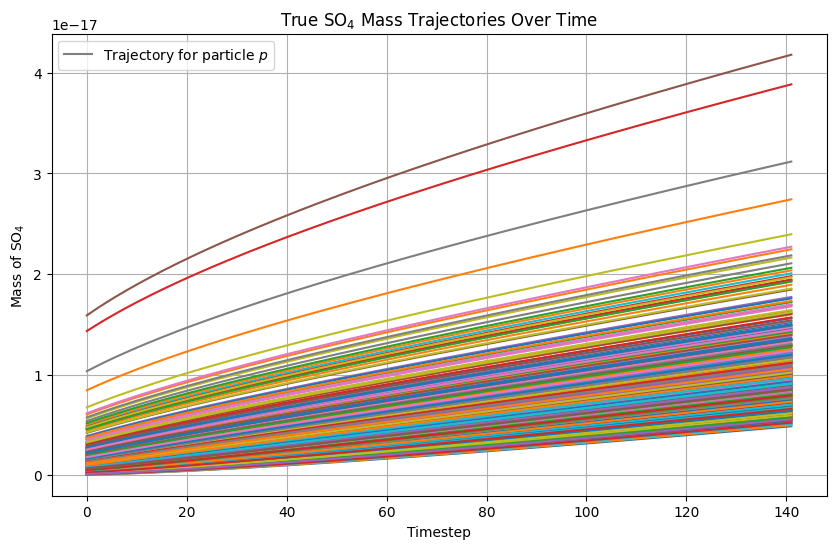

In [20]:
# Plot trajectories
plt.figure(figsize=(10, 6))
plt.plot(true_x['SO4'])

# Add labels and title
plt.xlabel('Timestep')
plt.ylabel('Mass of SO$_4$')
plt.title('True SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
plt.plot([], [], color='gray', label='Trajectory for particle $p$')
plt.legend(loc='upper left', frameon=True)

# Show plot
plt.grid(True)
plt.savefig("trueso4rep6.png")

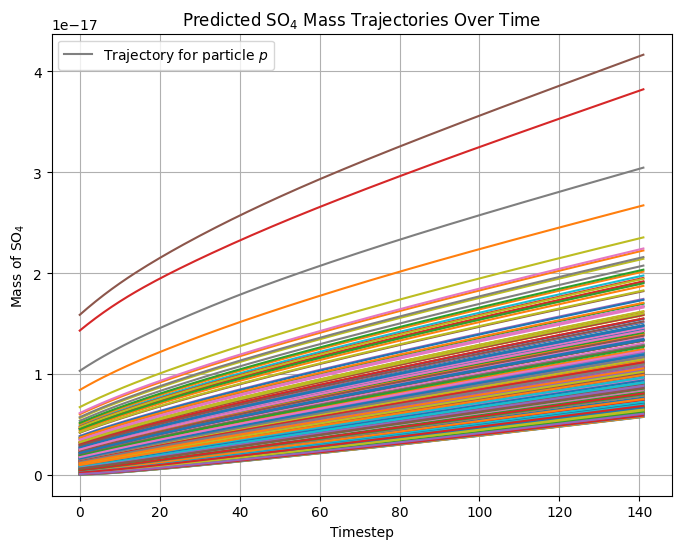

In [21]:
# Plot trajectories
plt.figure(figsize=(8, 6))
plt.plot(pred_x['SO4'])

# Add labels and title
plt.xlabel('Timestep')
plt.ylabel('Mass of SO$_4$')
#plt.xlim(0,144)
plt.title('Predicted SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
plt.plot([], [], color='gray', label='Trajectory for particle $p$')
plt.legend(loc='upper left', frameon=True)

# Show plot
plt.grid(True)
plt.savefig("so4rep6.png")

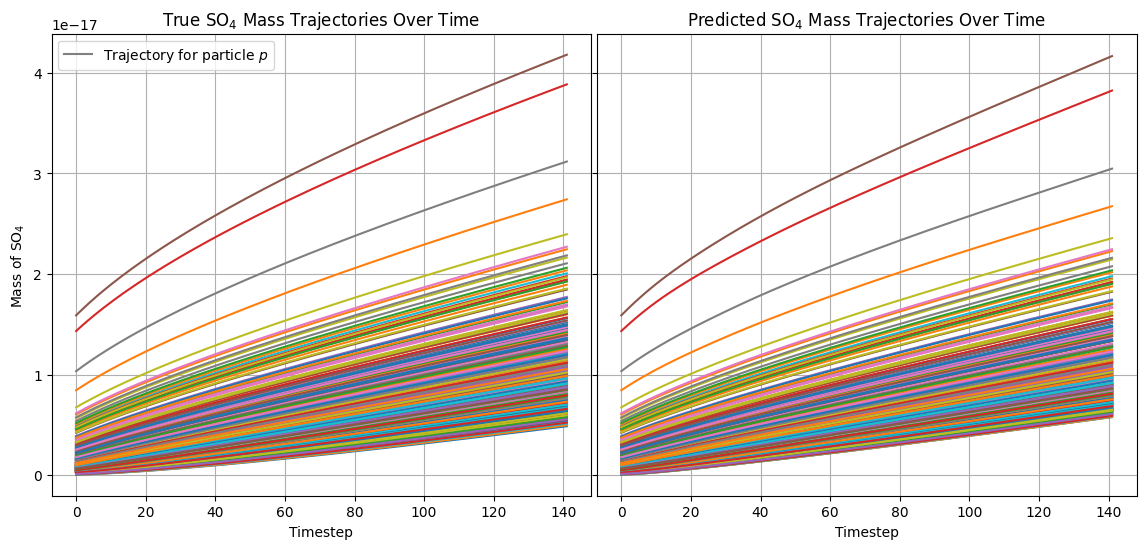

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['SO4'])
ax2.plot(pred_x['SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of SO$_4$')

ax1.set_title('True SO$_4$ Mass Trajectories Over Time')
ax2.set_title('Predicted SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("so4rep6.png")

In [23]:
ar.nmae(true_x['SO4'], pred_x['SO4'])

0.03521189657940613

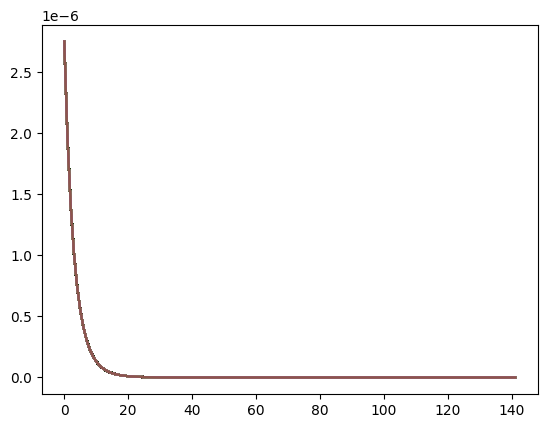

In [24]:
plt.plot(true_x['H2SO4'])
plt.show()

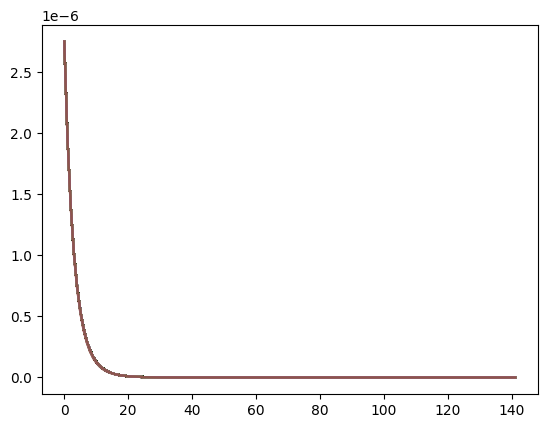

In [25]:
plt.plot(pred_x['H2SO4'])
plt.show()

In [26]:
pred_x['H2SO4'].shape

(142, 606)

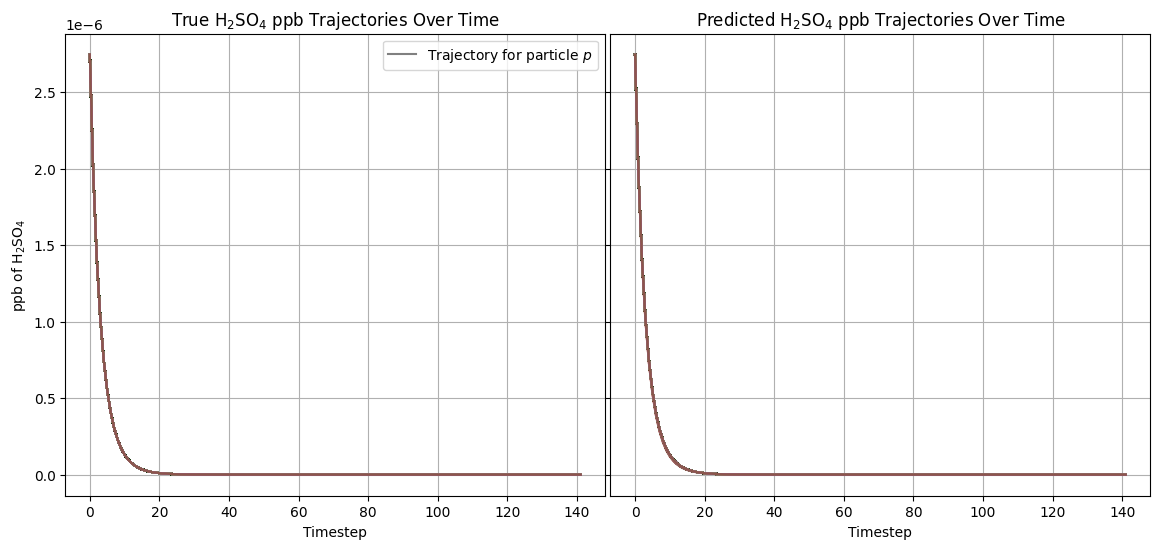

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2SO4'])
ax2.plot(pred_x['H2SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('ppb of H$_2$SO$_4$')

ax1.set_title('True H$_2$SO$_4$ ppb Trajectories Over Time')
ax2.set_title('Predicted H$_2$SO$_4$ ppb Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper right', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2so4rep6.png")

In [28]:
ar.nmae(true_x['H2SO4'], pred_x['H2SO4'])

0.019086033723160208

In [29]:
true_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': true_x['SO4']}

In [30]:
pred_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': pred_x['SO4']}

In [31]:
so4_diam = ar.gd_from_vol(ar.volume('SO4', true_dry_mass))

In [32]:
pred_so4_diam = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass))

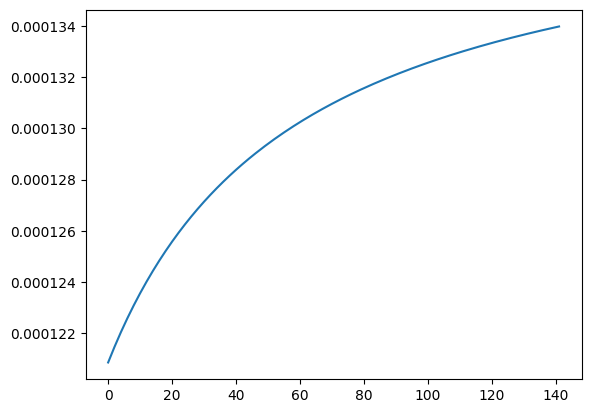

In [33]:
plt.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))

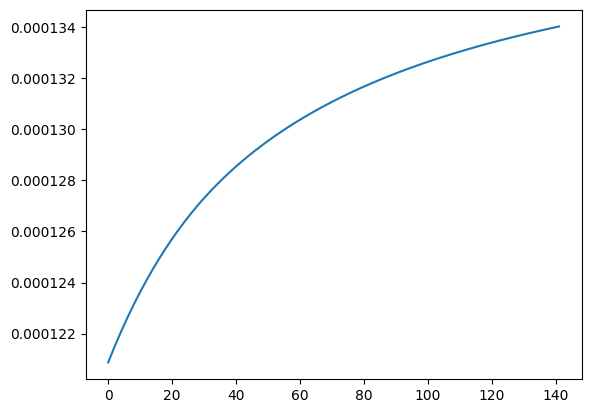

In [34]:
plt.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

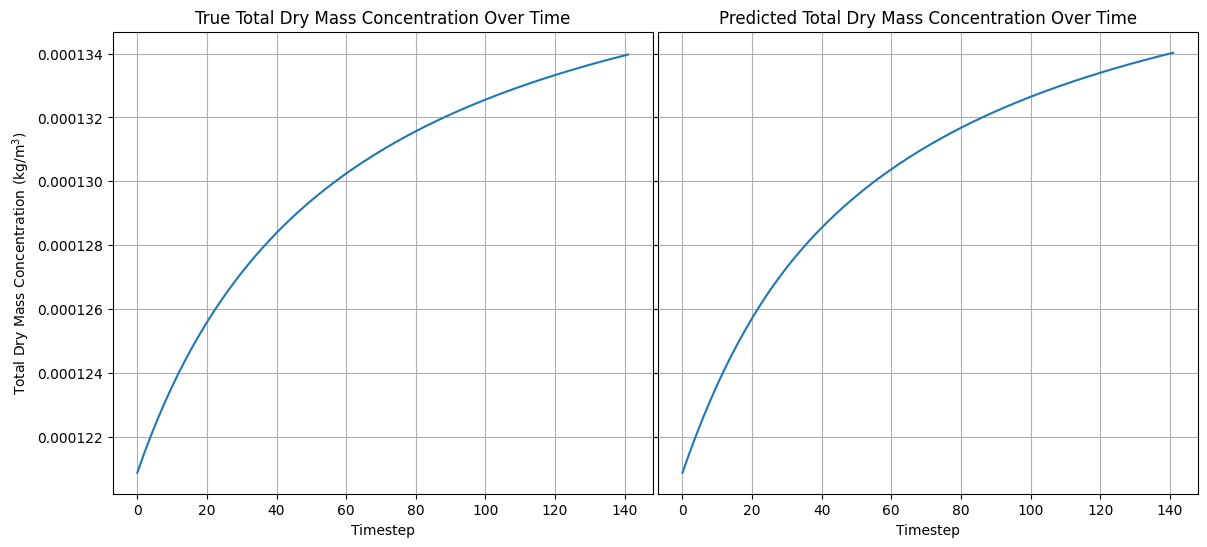

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))
ax2.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Total Dry Mass Concentration (kg/m$^3$)')

ax1.set_title('True Total Dry Mass Concentration Over Time')
ax2.set_title('Predicted Total Dry Mass Concentration Over Time')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("dm_conc_rep6.png")

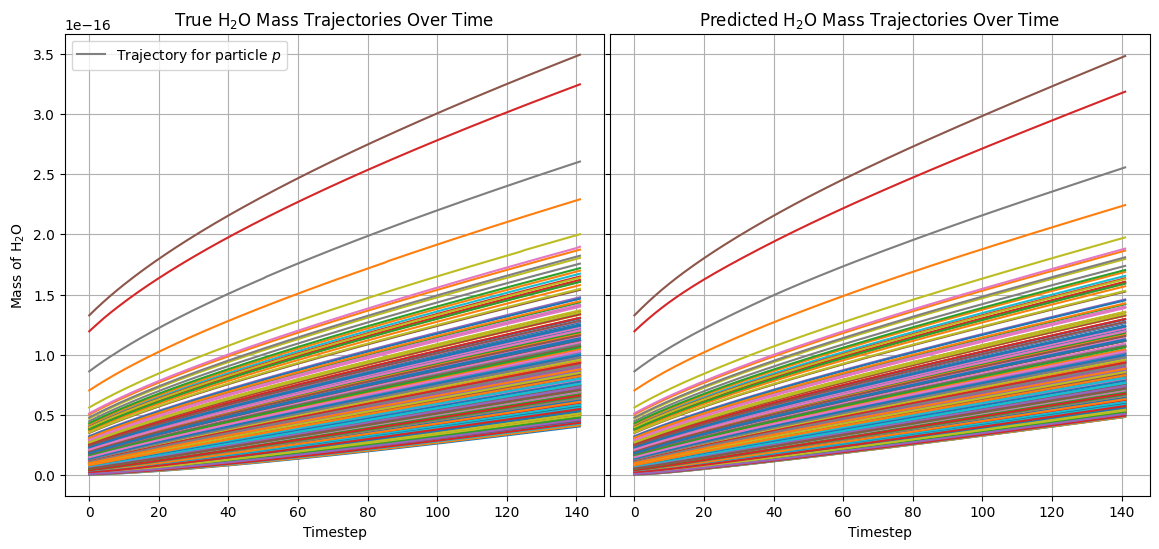

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2O'])
ax2.plot(pred_x['H2O'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of H$_2$O')

ax1.set_title('True H$_2$O Mass Trajectories Over Time')
ax2.set_title('Predicted H$_2$O Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2orep6.png")

In [37]:
ar.nmae(true_x['H2O'], pred_x['H2O'])

0.03964306061882715

In [38]:
total_true_drymass = sum(true_dry_mass.values())

In [39]:
total_pred_drymass = sum(pred_dry_mass.values())

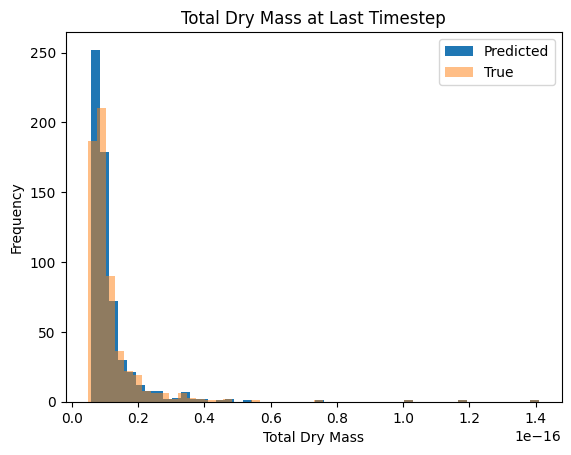

In [40]:
fig, ax = plt.subplots()
ax.hist(total_pred_drymass[-1,:], bins=50, label="Predicted")
ax.hist(total_true_drymass[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Total Dry Mass')
plt.ylabel('Frequency')
plt.title('Total Dry Mass at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dm_hist_rep6.png")

In [41]:
mat_prop['aero_number'].shape

(142, 606)

In [42]:
dNdt = mat_prop['aero_number'][1:,:] - mat_prop['aero_number'][:-1,:]

In [43]:
true_Ddry = ar.gd_from_vol(ar.volume('SO4', true_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [44]:
pred_Ddry = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [45]:
true_dDdrydt = true_Ddry[1:,:] - true_Ddry[:-1,:]

In [46]:
pred_dDdrydt = pred_Ddry[1:,:] - pred_Ddry[:-1,:]

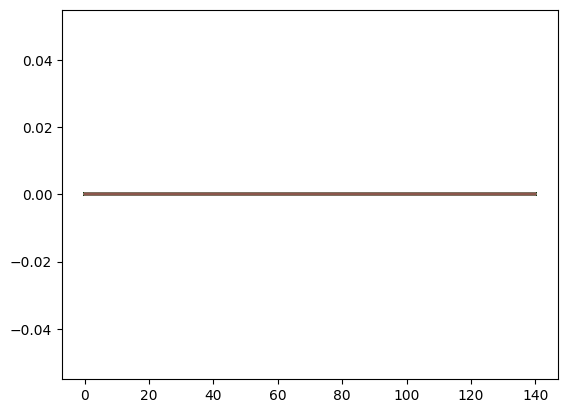

In [47]:
plt.plot(dNdt / pred_dDdrydt)
plt.show()

In [48]:
true_gmean, true_gstd = ar.mean_std_diameter(true_dry_mass)
pred_gmean, pred_gstd = ar.mean_std_diameter(pred_dry_mass)

In [49]:
diams = np.logspace(-9,-6, true_gmean.shape[0])

In [50]:
true_Ddry[-1,:].shape

(606,)

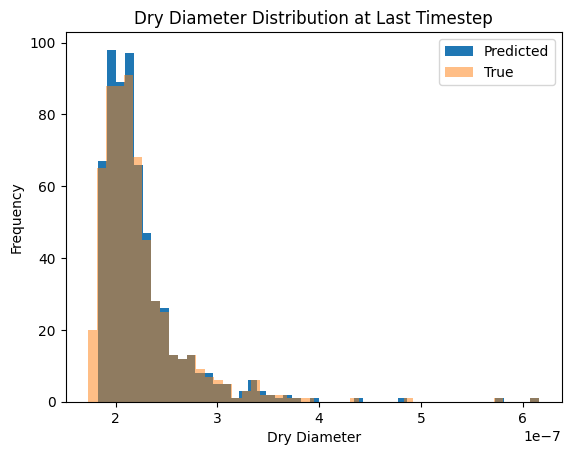

In [51]:
fig, ax = plt.subplots()
ax.hist(pred_Ddry[-1,:], bins=50, label="Predicted")
ax.hist(true_Ddry[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Dry Diameter')
plt.ylabel('Frequency')
plt.title('Dry Diameter Distribution at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dd_hist_rep6.png")

In [52]:
def lognormal_distro(number_conc, diams, gmeans, gstds):
    return ((number_conc / (np.sqrt(2*np.pi) * np.log10(gstds))) * 
            np.exp(-0.5 * ((np.log10(diams) - np.log10(gmeans))**2 / (2 * np.log10(gstds)**2))))

In [53]:
true_nD = lognormal_distro(mat_prop['aero_number'], true_Ddry, true_gmean, true_gstd)
pred_nD = lognormal_distro(mat_prop['aero_number'], pred_Ddry, pred_gmean, pred_gstd)

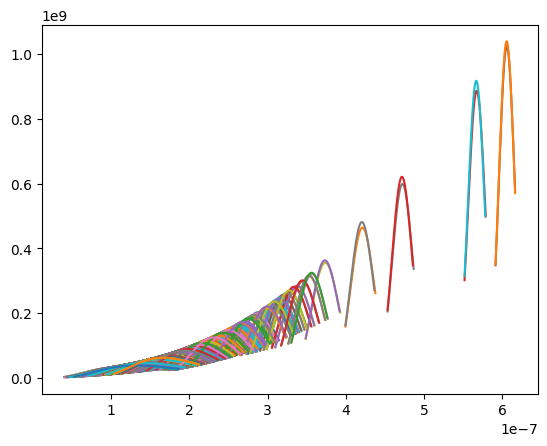

In [54]:
plt.plot(true_Ddry, true_nD)
plt.plot(pred_Ddry, pred_nD)
plt.show()

In [55]:
# for i in range(0, true_drymass.shape[0], 10):
#     fig, ax = plt.subplots()
#     ax.hist(pred_drymass[i,:], bins=100)
#     ax.hist(true_drymass[i,:], bins=100, alpha=0.5)
#     plt.savefig(f"./figures/hists/hist{i}.png")
#     plt.close()